In [101]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/particle-identification/training.csv
/kaggle/input/particle-identification/test.csv


In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [103]:
data = pd.read_csv('/kaggle/input/particle-identification/training.csv')
data.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
0,74791.156263,15.0,0.232275,1.0,1.0,3.2,-2.505719,6.604153,1.0,1.929960,...,28.0,1.0,-7.213300,-0.280200,5586.589846,1.0,1.0,10.422315,-2.081143e-07,-24.824400
1,2738.489989,15.0,-0.357748,0.0,1.0,3.2,1.864351,0.263651,1.0,-2.061959,...,32.0,1.0,-0.324317,1.707283,-0.000007,0.0,1.0,43.334935,2.771583e+00,-0.648017
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.0,-999.000000,-999.000000,0.0,-999.000000,...,27.0,0.0,-999.000000,-999.000000,-999.000000,0.0,0.0,-999.000000,-9.990000e+02,-999.000000
3,15277.730490,20.0,-0.638984,0.0,1.0,3.2,-2.533918,-8.724949,1.0,-3.253981,...,36.0,1.0,-35.202221,-14.742319,4482.803707,0.0,1.0,2.194175,-3.070819e+00,-29.291519
4,7563.700195,19.0,-0.638962,0.0,1.0,3.2,-2.087146,-7.060422,1.0,-0.995816,...,33.0,1.0,25.084287,-10.272412,5107.554680,0.0,1.0,0.000015,-5.373712e+00,23.653087


In [104]:
label_class_correspondence = {'Electron' : 0, 'Ghost' : 1, 'Kaon' : 2, 'Muon' : 3, 'Pion' : 4, 'Proton' : 5}
class_label_correspondence = {0 : 'Electron', 1 : 'Ghost', 2 : 'Kaon', 3 : 'Muon', 4 : 'Pion', 5 : 'Proton'}

def get_class_id(labels):
  return np.array([label_class_correspondence[alabel] for alabel in labels])

data['Class'] = get_class_id(data.Label.values)

In [105]:
data['Class'] = get_class_id(data.Label.values)
set(data.Class)

{0, 1, 2, 3, 4, 5}

In [106]:
set(data.Label)

{'Electron', 'Ghost', 'Kaon', 'Muon', 'Pion', 'Proton'}

In [107]:
features = list(set(data.columns) - {'Label', 'Class'})
features


['Calo2dFitQuality',
 'FlagPrs',
 'HcalDLLbeMuon',
 'HcalE',
 'TrackNDoFSubdetector2',
 'RICHpFlagPion',
 'TrackP',
 'TrackDistanceToZ',
 'FlagRICH1',
 'GhostProbability',
 'FlagBrem',
 'MuonLLbeBCK',
 'MuonLLbeMuon',
 'MuonLooseFlag',
 'TrackQualitySubdetector1',
 'HcalDLLbeElectron',
 'RICHpFlagMuon',
 'FlagMuon',
 'MuonFlag',
 'PrsE',
 'RICH_DLLbeKaon',
 'TrackQualitySubdetector2',
 'RICHpFlagKaon',
 'RICHpFlagElectron',
 'EcalE',
 'EcalDLLbeMuon',
 'DLLkaon',
 'EcalShowerLongitudinalParameter',
 'RICH_DLLbeProton',
 'FlagEcal',
 'RICH_DLLbeElectron',
 'SpdE',
 'DLLproton',
 'RICHpFlagProton',
 'DLLmuon',
 'TrackQualityPerNDoF',
 'PrsDLLbeElectron',
 'DLLelectron',
 'RICH_DLLbeMuon',
 'Calo3dFitQuality',
 'RICH_DLLbeBCK',
 'FlagRICH2',
 'TrackNDoF',
 'TrackNDoFSubdetector1',
 'EcalDLLbeElectron',
 'FlagSpd',
 'FlagHcal',
 'BremDLLbeElectron',
 'TrackPt']

In [108]:

training_data, validation_data = train_test_split(data, random_state=11, train_size=0.90)

In [109]:
len(training_data), len(validation_data)

(1080000, 120000)

In [110]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
training_data_scaled = scaler.fit_transform(training_data[features].values)
validation_data_scaled = scaler.fit_transform(validation_data[features].values)

In [111]:
X_train_scaled = training_data_scaled.reshape(-1, 7, 7, 1)

In [112]:
X_train_scaled.shape

(1080000, 7, 7, 1)

In [113]:
import tensorflow as tf
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from keras import backend


steps_per_epoch = 1045
step = tf.Variable(0, trainable=False)
boundaries = []
for i in range(1, 4):
    boundaries.append(steps_per_epoch * (i * 100))
values = [1e-3, 1e-4, 1e-5, 1e-6]
learning_rate_fn = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries, values)

learning_rate = learning_rate_fn(step)

In [114]:
def scheduler(epoch, lr):
    if epoch == 0:
        lr = 0.001
        return lr
    elif epoch == 100:
        lr = 0.0001
        return lr
    elif epoch == 200:
        lr = 0.00001
        return lr
    else:
        return lr

In [115]:
class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.lr
        # If you want to apply decay.
        #lr = lr / (1. + decay * K.cast(iterations, K.dtype(decay)))
        print(backend.eval("\tLearning Rate: {}".format(float(lr))))
        #print("\t{}".format(step))

cb = MyCallback()

In [116]:
lr_cb = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [117]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 

In [118]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
#lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False
optimizer = Adam()
model_cnn = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv1D(64, 2, activation = 'tanh', input_shape = (49, 1)),
                                    tf.keras.layers.MaxPooling1D(),
                                    tf.keras.layers.Dropout(0.3),
                                    #tf.keras.layers.BatchNormalization(),
                                    #tf.keras.layers.Conv1D(32, 2, activation = 'tanh'),
                                    #tf.keras.layers.MaxPooling1D(),
                                    #tf.keras.layers.Dropout(0.5),
                                    #tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = 'tanh'),
                                    tf.keras.layers.Dense(64, activation = 'tanh'),
                                    tf.keras.layers.Dense(6, activation = 'softmax')
])

model_cnn.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['acc'])
model_cnn.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 48, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       196,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,574 (803.02 KB)

 Trainable params: 205,574 (803.02 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
hist = model_cnn.fit(X_train_scaled.reshape(-1, 49, 1), tf.keras.utils.to_categorical(training_data.Class.values),  verbose = True, epochs = 2, validation_split=0.01, batch_size= 1024, callbacks = (lr_cb))

Epoch 1/2
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 51s 47ms/step - acc: 0.6410 - loss: 0.9029 - val_acc: 0.7294 - val_loss: 0.6534 - learning_rate: 0.0010
Epoch 2/2
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 48s 46ms/step - acc: 0.7245 - loss: 0.6747 - val_acc: 0.7442 - val_loss: 0.6259 - learning_rate: 0.0010


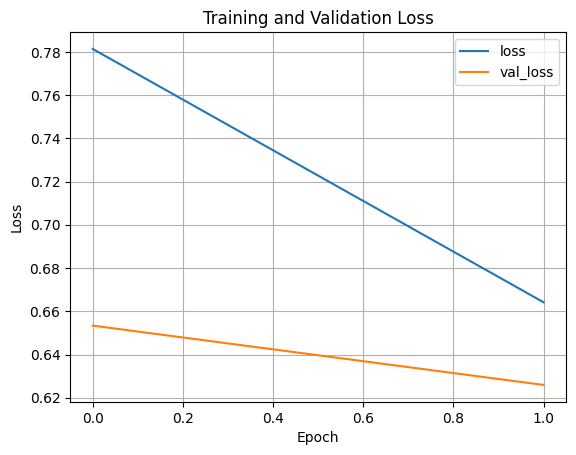

In [120]:
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


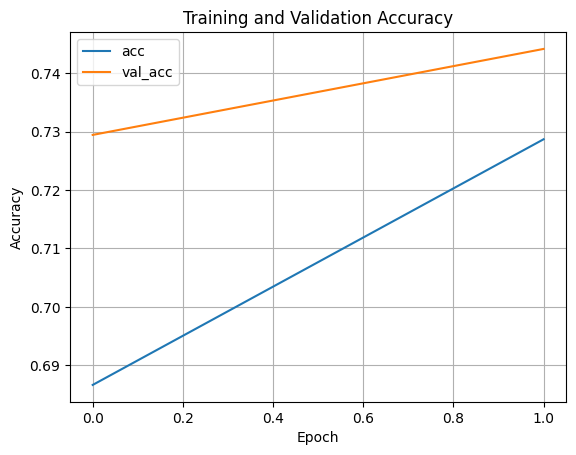

In [121]:
plt.plot(hist.history['acc'], label = 'acc')
plt.plot(hist.history['val_acc'], label = 'val_acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step


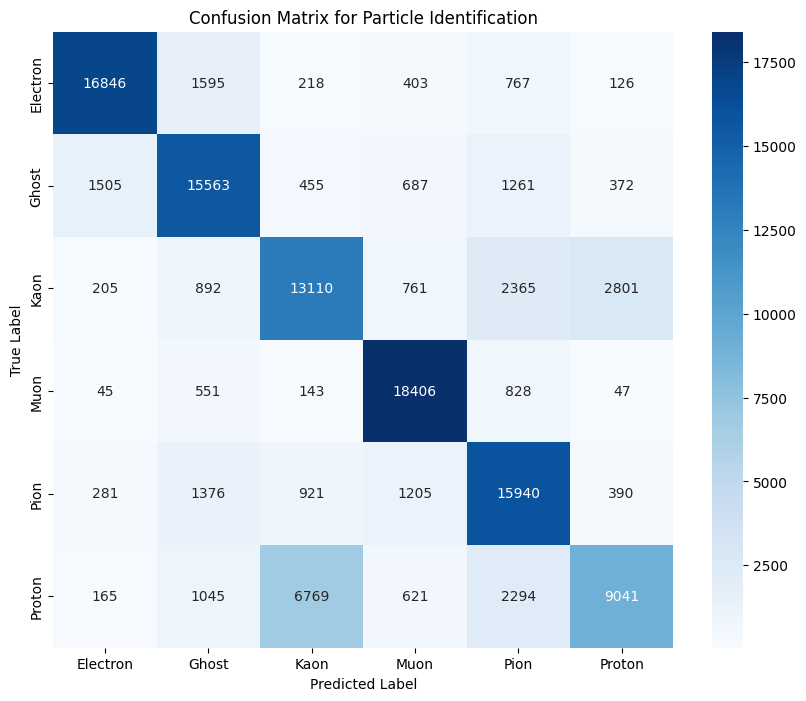

In [122]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, log_loss
# --- Confusion Matrix ---
# Make predictions on validation data
pred = model_cnn.predict(validation_data_scaled.reshape(-1, 49, 1))
pred_labels = np.argmax(pred, axis=1)
true_labels = validation_data.Class.values

# Compute confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
class_names = [class_label_correspondence[i] for i in range(6)]

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Particle Identification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [123]:
from sklearn.metrics import confusion_matrix, classification_report, log_loss
# Print classification report
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=class_names))

# --- Analyze Confusion Matrix ---
print("\nConfusion Matrix Analysis:")
for i in range(len(class_names)):
    TP = cm[i, i]
    FN = cm[i, :].sum() - TP
    FP = cm[:, i].sum() - TP
    TN = cm.sum() - (TP + FN + FP)
    print(f"\nClass: {class_names[i]}")
    print(f"True Positives (TP): {TP}")
    print(f"False Negatives (FN): {FN}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

# Save outputs
plt.savefig('/kaggle/working/confusion_matrix.png')
np.savetxt('/kaggle/working/confusion_matrix.txt', cm, fmt='%d')


Classification Report:
              precision    recall  f1-score   support

    Electron       0.88      0.84      0.86     19955
       Ghost       0.74      0.78      0.76     19843
        Kaon       0.61      0.65      0.63     20134
        Muon       0.83      0.92      0.87     20020
        Pion       0.68      0.79      0.73     20113
      Proton       0.71      0.45      0.55     19935

    accuracy                           0.74    120000
   macro avg       0.74      0.74      0.74    120000
weighted avg       0.74      0.74      0.74    120000


Confusion Matrix Analysis:

Class: Electron
True Positives (TP): 16846
False Negatives (FN): 3109
False Positives (FP): 2201
True Negatives (TN): 97844
Precision: 0.88
Recall: 0.84

Class: Ghost
True Positives (TP): 15563
False Negatives (FN): 4280
False Positives (FP): 5459
True Negatives (TN): 94698
Precision: 0.74
Recall: 0.78

Class: Kaon
True Positives (TP): 13110
False Negatives (FN): 7024
False Positives (FP): 8506
True N

<Figure size 640x480 with 0 Axes>

In [124]:
import matplotlib.pyplot as plt
import numpy
import pandas
from sklearn.metrics import roc_curve, roc_auc_score


label_class_correspondence = {'Electron': 0, 'Ghost': 1, 'Kaon': 2, 'Muon': 3, 'Pion': 4, 'Proton': 5}
class_label_correspondence = {0: 'Electron', 1: 'Ghost', 2: 'Kaon', 3: 'Muon', 4: 'Pion', 5: 'Proton'}


def get_class_ids(labels):
    """
    Convert particle type names into class ids.
    Parameters:
    -----------
    labels : array_like
        Array of particle type names ['Electron', 'Muon', ...].
    Return:
    -------
    class ids : array_like
        Array of class ids [1, 0, 3, ...].
    """
    return numpy.array([label_class_correspondence[alabel] for alabel in labels])


def plot_roc_curves(predictions, labels):
    """
    Plot ROC curves.
    Parameters:
    -----------
    predictions : array_like
        Array of particle type predictions with shape=(n_particles, n_types).
    labels : array_like
        Array of class ids [1, 0, 3, ...].
    """
    plt.figure(figsize=(9, 6))
    u_labels = numpy.unique(labels)
    for lab in u_labels:
        y_true = labels == lab
        y_pred = predictions[:, lab]
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        auc = roc_auc_score(y_true, y_pred)
        plt.plot(tpr, 1-fpr, linewidth=3, label=class_label_correspondence[lab] + ', AUC = ' + str(numpy.round(auc, 4)))
        plt.xlabel('Signal efficiency (TPR)', size=15)
        plt.ylabel("Background rejection (1 - FPR)", size=15)
        plt.xticks(size=15)
        plt.yticks(size=15)
        plt.xlim(0., 1)
        plt.ylim(0., 1)
        plt.legend(loc='lower left', fontsize=15)
        plt.title('One particle vs rest ROC curves', loc='right', size=15)
        plt.grid(visible=1)
        
        
def my_percentile(arr, w, q):

    left = 0.
    right = (w).sum()
    sort_inds = numpy.argsort(arr, axis=0)
    if left/right >= q/100.:
        return arr[0]
    for i in sort_inds:
        left += w[i]
        if left/right >= q/100.:
            return arr[i]

def base_plot(prediction, spectator, cut, percentile=True, weights=None, n_bins=100,
              color='b', marker='o', ms=4, label="MVA", fmt='o', markeredgecolor='b', markeredgewidth=2, ecolor='b'):
    """
    Base plot for signal efficiency.
    Parameters:
    -----------
    prediction : array_like
        Array of predictions for signal for a selected particle type with shape=(n_particles, ).
    spectator : array_like
        To plot dependence of signal efficiency on this feature.
    cut : float
        Global efficiency value.
    bins : int
        Number of bin for plot.
    """
    if weights is None:
        weights = numpy.ones(len(prediction))

    if percentile:
        if weights is None:
            cut = numpy.percentile(prediction, 100-cut)
        else:
            cut = my_percentile(prediction, weights, 100-cut)
    
    edges = numpy.linspace(spectator.min(), spectator.max(), n_bins)
    
    xx = []
    yy = []
    xx_err = []
    yy_err = []
    
    for i_edge in range(len(edges)-1):

        left = edges[i_edge]
        right = edges[i_edge + 1]
        
        N_tot_bin = weights[((spectator >= left) * (spectator < right))].sum()
        N_cut_bin = weights[((spectator >= left) * (spectator < right) * (prediction >= cut))].sum()
        
        if N_tot_bin != 0:
            
            x = 0.5 * (right + left)
            y = 1. * N_cut_bin / N_tot_bin
            
            if y > 1.:
                y = 1.
            if y < 0:
                y = 0
            
            xx.append(x)
            yy.append(y)
            
            x_err = 0.5 * (right - left)
            y_err = numpy.sqrt(y*(1-y)/N_tot_bin)
            
            xx_err.append(x_err)
            yy_err.append(y_err)
        
        else:
            pass

    plt.errorbar(xx, yy, yerr=yy_err, xerr=xx_err, fmt=fmt, color=color, marker=marker, ms=ms, label=label, markeredgecolor=markeredgecolor, markeredgewidth=markeredgewidth, ecolor=ecolor)
    
    return cut

def plot_signal_efficiency(predictions, labels, spectator, eff=60, n_bins=20, xlabel='Spectator'):
    """
    Plot dependence of signal efficiency from spectator feature for all particle types.
    Parameters:
    -----------
    prediction : array_like
        Array of predictions for signal for a selected particle type with shape=(n_particles, ).
    labels : array_like
        Array of class ids [1, 0, 3, ...].
    spectator : array_like
        To plot dependence of signal efficiency on this feature.
    cut : float
        Global efficiency value.
    bins : int
        Number of bin for plot.
    xlabel : string
        Label of x-axis.
    """
    
    plt.figure(figsize=(5.5*2, 3.5*3))
    u_labels = numpy.unique(labels)
    for lab in u_labels:
        y_true = labels == lab
        pred = predictions[y_true, lab]
        spec = spectator[y_true]
        plt.subplot(3, 2, lab+1)
        base_plot(pred, spec, cut=eff, percentile=True, weights=None, n_bins=n_bins, color='1', marker='o', 
                  ms=7, label=class_label_correspondence[lab], fmt='o')
        
        plt.plot([spec.min(), spec.max()], [eff / 100., eff / 100.], label='Global signal efficiency', color='r', linewidth=3)
        plt.legend(loc='best', fontsize=12)
        plt.xticks(size=12)
        plt.yticks(size=12)
        plt.ylabel('Signal efficiency (TPR)', size=12)
        plt.xlabel(xlabel,size=12)
        plt.ylim(0, 1)
        plt.xlim(spec.min(), spec.max())
        plt.grid(visible =1)
    plt.tight_layout()
        

def plot_signal_efficiency_on_p(predictions, labels, spectator, eff=60, n_bins=20):
    """
    Plot dependence of signal efficiency from particle momentum feature for all particle types.
    Parameters:
    -----------
    prediction : array_like
        Array of predictions for signal for a selected particle type with shape=(n_particles, ).
    labels : array_like
        Array of class ids [1, 0, 3, ...].
    spectator : array_like
        To plot dependence of signal efficiency on this feature.
    cut : float
        Global efficiency value.
    bins : int
        Number of bin for plot.
    """
    sel = spectator < 200 * 10**3
    plot_signal_efficiency(predictions[sel], labels[sel], spectator[sel] / 10**3, eff, n_bins, 'Momentum, GeV/c')
    

def plot_signal_efficiency_on_pt(predictions, labels, spectator, eff=60, n_bins=20):
    """
    Plot dependence of signal efficiency from particle transverse momentum feature for all particle types.
    Parameters:
    -----------
    prediction : array_like
        Array of predictions for signal for a selected particle type with shape=(n_particles, ).
    labels : array_like
        Array of class ids [1, 0, 3, ...].
    spectator : array_like
        To plot dependence of signal efficiency on this feature.
    cut : float
        Global efficiency value.
    bins : int
        Number of bin for plot.
    """
    sel = spectator < 10 * 10**3
    plot_signal_efficiency(predictions[sel], labels[sel], spectator[sel] / 10**3, eff, n_bins, 'Transverse momentum, GeV/c')

In [125]:
pred = model_cnn.predict(validation_data_scaled.reshape(-1, 49, 1))

3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step


In [126]:
log_loss(validation_data.Class.values, pred)

0.636234206974259

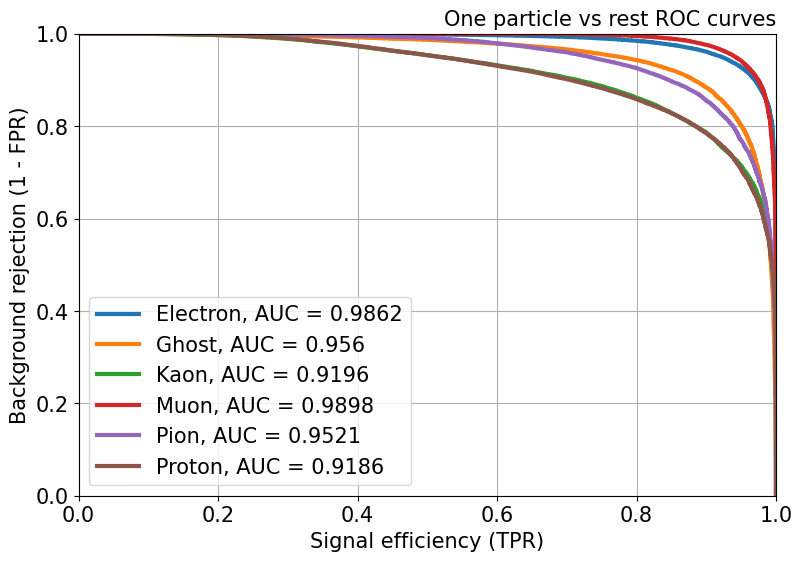

In [127]:
plot_roc_curves(pred, validation_data.Class.values)

/tmp/ipykernel_36/933216871.py:128: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(xx, yy, yerr=yy_err, xerr=xx_err, fmt=fmt, color=color, marker=marker, ms=ms, label=label, markeredgecolor=markeredgecolor, markeredgewidth=markeredgewidth, ecolor=ecolor)


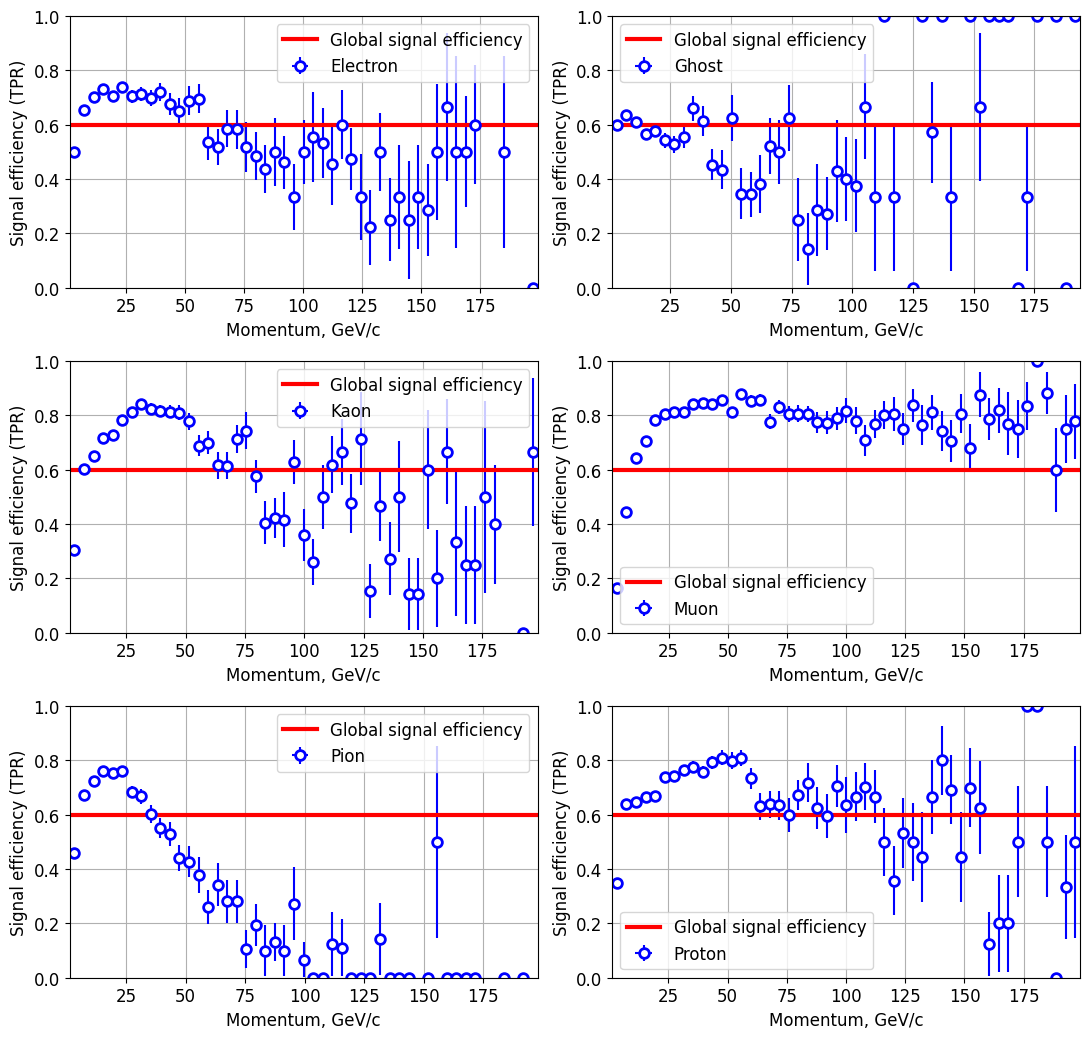

In [128]:
plot_signal_efficiency_on_p(pred, validation_data.Class.values, validation_data.TrackP.values, 60, 50)
plt.show()


/tmp/ipykernel_36/933216871.py:128: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(xx, yy, yerr=yy_err, xerr=xx_err, fmt=fmt, color=color, marker=marker, ms=ms, label=label, markeredgecolor=markeredgecolor, markeredgewidth=markeredgewidth, ecolor=ecolor)


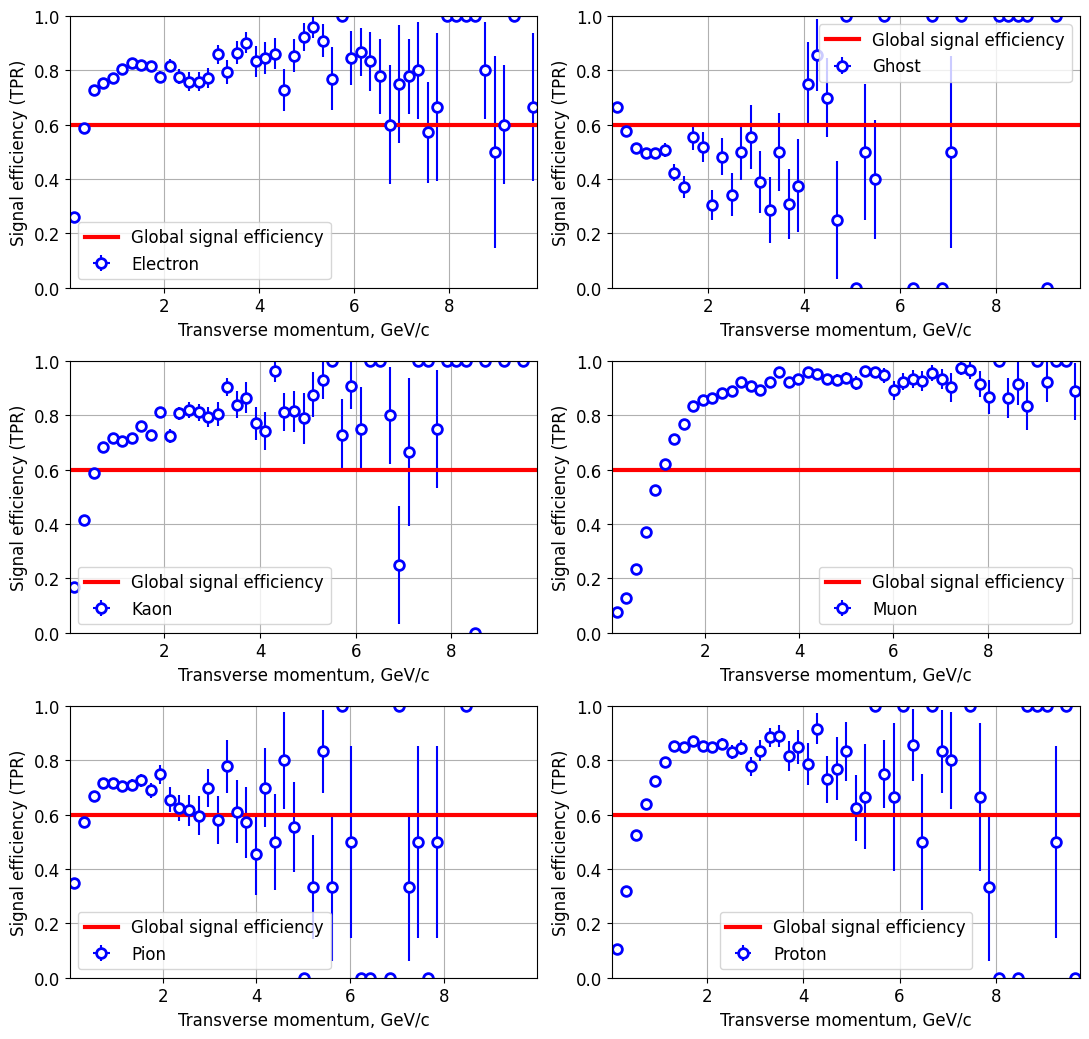

In [129]:
plot_signal_efficiency_on_pt(pred, validation_data.Class.values, validation_data.TrackPt.values, 60, 50)
plt.show()


In [130]:
model_cnn.save("/content/drive/My Drive/models/DNN_model.h5")